# Comparing Total Wage Between Males and Females

### Introduction

**Research Question:** Is there a significant difference between the average salary for men and women? 

*Variable of interest:* Annual Salary. <br>
*Categories:* Men and Women.

Past research has shown there is an appreciable difference in salary between men and women, even when working the same jobs (Hoisl & Mariani, 2016). We want to see if the same pattern can be observed when we use a dataset to compare the mean salary between these two genders. To further look into this question, we will use the dataset glassdoor_salaries.csv from 2019, containing 1001 rows of data. The dataset contains 9 columns (see Preliminary Results section for details). As we want to compare gender and total salary, we will clean and wrangle our dataset. Then we will only select the total salary and gender columns.

In [2]:
# Set up
library(repr)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
library(ggplot2)
library(gridExtra)

set.seed(1234)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.3     ✔ workflows    1.0.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.1     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

### Preliminary Results

We will first read the data from from a public github repository to make the data reproducible. We then print a preview of the dataset to see the column names and a few observations.

In [3]:
# Reading in data
url <- "https://raw.githubusercontent.com/karlie-tr/STAT201-GroupProject/main/glassdoor_salaries.csv"
untidy_salary_data <- read_csv(url)

head(untidy_salary_data)

Rows: 1000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): JobTitle, Gender, Education, Dept
dbl (5): Age, PerfEval, Seniority, BasePay, Bonus

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Graphic Designer,Female,18,5,College,Operations,2,42363,9938
Software Engineer,Male,21,5,College,Management,5,108476,11128
Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
IT,Female,20,5,PhD,Operations,4,70890,10126


We then combine the base pay and bonus into one column and filter for NA values and the variable of interest.

In [4]:
# Tidy dataset, combine BasePay and Bonus into Annual_Salary
salary_data <- untidy_salary_data %>%
                    mutate(Annual_Salary = BasePay + Bonus,
                           Gender = as.factor(Gender)) %>%
                    select(Gender, Annual_Salary) %>%
                    na.omit()


head(salary_data)

Gender,Annual_Salary
<fct>,<dbl>
Female,52301
Male,119604
Female,99476
Male,118234
Male,108783
Female,81016


We compare parameter estimates of the males and females by taking the mean, median, and standard deviation of each the male and female subgroups. This provides a quick comparison of the annual salary of males and females.

In [5]:
salary_data_summary <- salary_data %>% 
    group_by(Gender) %>% 
    summarize(Mean_Salary = mean(Annual_Salary),
              Median_Salary = median(Annual_Salary),
              SD_Salary = sd(Annual_Salary),
              Num_Observations = n())


salary_data_summary

Gender,Mean_Salary,Median_Salary,SD_Salary,Num_Observations
<fct>,<dbl>,<dbl>,<dbl>,<int>
Female,96416.83,96571.0,24202.16,468
Male,104918.68,105100.5,25329.57,532


Filter for male and female and plot the data of each (to visually compare the male vs. female salaries).

In [6]:
# plot histogram of annual salaries

# histogram of male salaries
male_salary_distribution_plot <- salary_data %>%
                                    filter(Gender == "Male") %>%   # filter for male's salary
                                    ggplot() +
                                    geom_histogram(aes(x = Annual_Salary),color = "white", bins = 10) +
                                    scale_x_continuous(labels = scales::dollar_format(scale = .001, suffix = "K")) +   
                                    labs(x = "Annual Salary") +
                                    ggtitle("Sample Distribution of \nMale Employees' Annual Salary")


# histogram of female salaries
female_salary_distribution_plot <- salary_data %>%
                                    filter(Gender == "Female") %>%  # filter for female's salary
                                    ggplot() +
                                    geom_histogram(aes(x = Annual_Salary),color = "white", bins = 10) +
                                    scale_x_continuous(labels = scales::dollar_format(scale = .001, suffix = "K")) +
                                    labs(x = "Annual Salary") +
                                    ggtitle("Sample Distribution of \nFemale Employees' Annual Salary")

We use grid.arrange to plot the two histograms side by side.

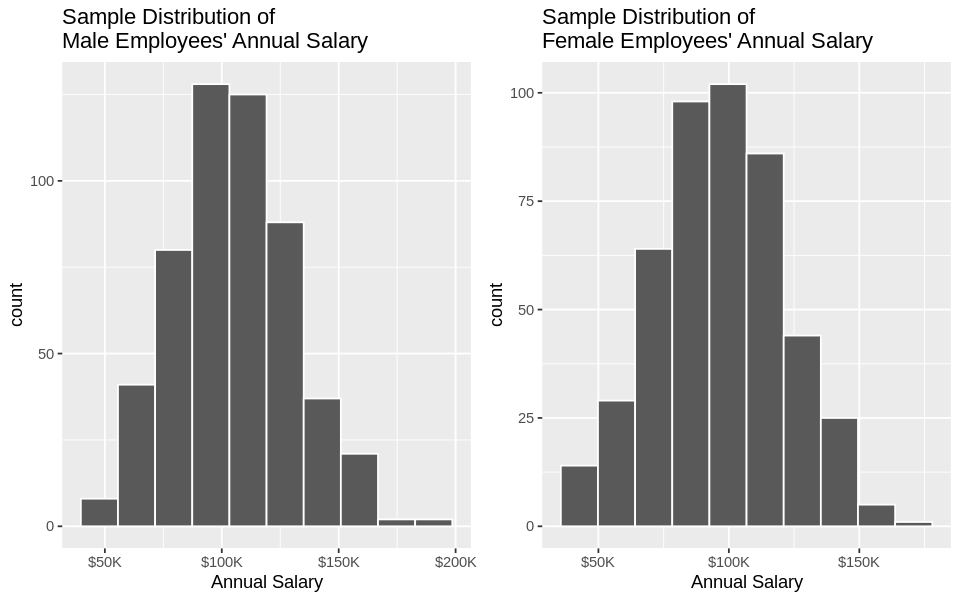

In [7]:
# Sample distribution of Salary
options(repr.plot.width = 8, repr.plot.height = 5)

grid.arrange(male_salary_distribution_plot, female_salary_distribution_plot, ncol = 2)

We can then plot the male and female data using a boxplot. This provides an alternative visual comparison to the histogram. This shows a comparison of the medians and the upper and lower quartiles. Additionally, the plot provides insight into the minimum and maximum.

In [8]:
# Boxplot to compare between Male and Female
salary_boxplot <- salary_data %>%
                    ggplot() +
                    geom_boxplot(aes(x = Annual_Salary, y = Gender, fill = Gender)) +
                    labs(x = "Annual Salary") +
                    scale_fill_brewer(palette = "Dark2") +
                    scale_x_continuous(labels = scales::dollar_format(scale = .001, suffix = "K")) +
                    theme(legend.position = "none") +
                    coord_flip() + 
                    ggtitle("Box Plot of Annual Salary and Gender")

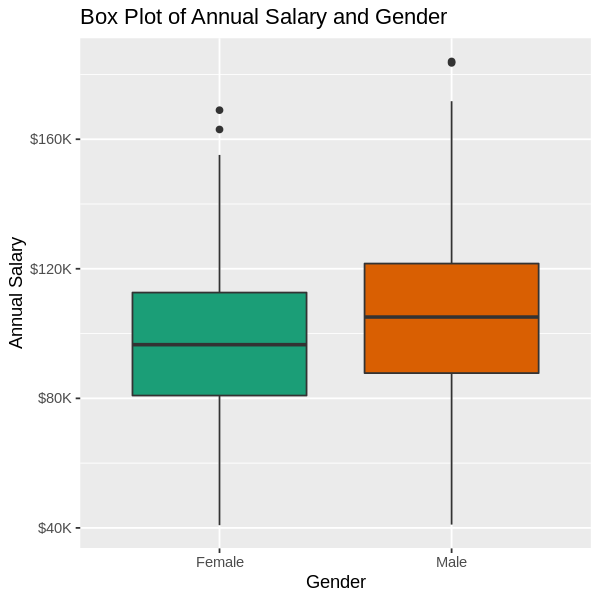

In [9]:
options(repr.plot.width = 5, repr.plot.height = 5)
salary_boxplot

The above plot suggests that there are only a few outliers and there is a difference between these groups. This difference is illustrated through the male group’s box plot having a higher mean and most observations have higher salary than the female group.

### Methods

Using just a sample mean is not sufficient because there is a possibility that the difference in means could happen by chance. Thus, a more statistical test should be used to answer the question. We will use a t-test to test the difference of two sample means (male and female) since we do not have access to the whole population. One assumption of using a two-sample t-test is that the observations in one sample are independent of those in the other sample. The histograms and box plot generated showing the data are approximately normally distributed, hence the t-test is valid for use in this situation.

We will determine if there is a significant difference in the salaries, and if applicable, its magnitude. Therefore, conducting a hypothesis test with the following hypotheses would provide a more accurate conclusion:

**Null hypothesis:** μ Male = μ Female 

**Alternative hypothesis:**  μ Male > μ Female 

We are expecting our results to show the salary of males to be greater than females based on existing studies from Hoisl & Marian (2016) and Blau & Kahn (2017), so a one-tailed alternative is appropriate.

With sufficiently large sample size and sample distributions closely resembling a normal distribution (see histograms and box plot), our results would be trustworthy in reporting the wage gap since the data used is primary numerical data.
This result would corroborate conclusions of current literature on this subject. Future investigations could explore the underlying cause of the difference in salary as well as look into other factors that affect it. 


### References

* Arceo-Gomez, E.O., Campos-Vazquez, R.M., Badillo, R.Y. et al. (2022). Gender stereotypes in job advertisements: What do they imply for the gender salary gap?. J Labor Res 43, 65–102. https://doi.org/10.1007/s12122-022-09331-4

* Hoisl, K. & Mariani, M. (2016). It’s a Man’s Job: Income and the Gender Gap in Industrial Research. Management Science 63(3):766-790.
https://doi.org/10.1287/mnsc.2015.2357

* Blau, F. D. & Kahn, L. M. (2017). The Gender Wage Gap: Extent, Trends, and Explanations. J Econ Lit 55(3):789–865. https://doi.org/10.1257/jel.20160995

* Jauhari, N. (2019). Glassdoor- Analyze Gender Pay Gap [Dataset]. Kaggle. https://www.kaggle.com/datasets/nilimajauhari/glassdoor-analyze-gender-pay-gap/discussion  